# 2장 실습

## ■ OpenCV
- 영상 처리를 위한 Python library
- OpenCV는 C + +, Python, Java, R 등과 같은 다양한 프로그래밍 언어를 지원
- Windows, Linux, OS X, Android 및 iOS를 포함한 다양한 플랫폼에서 사용
- OpenCV-Python Tutorials
    - https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
- 설치
    - !pip install opencv-python

In [1]:
### OpenCV 설치
#!pip install opencv-python

In [ ]:
#!pip install easygui

In [2]:
### Packages
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from easygui import fileopenbox
import os

In [3]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9)
### 한글 표시
plt.rcParams['font.family'] = "Gulim"

# ▶ 영상 읽기
- cv2.imread(fileName, flag)
    - fileName: 파일 경로 및 이름. 한글 지원 안 됨
    - flag
        - cv2.IMREAD_COLOR (or 1): color
        - cv2.IMREAD_GRAYSCALE (or 0): grayscale
        - cs2.IMREAD_UNCHANGED (or -1): color + alpha channel

In [4]:
# Get the current working directory
os.getcwd()

'C:\\Users\\sse88\\OneDrive\\바탕 화면\\영상처리'

In [5]:
### 파일
img_file = fileopenbox(msg = "lena_color", default = r"C:\Users\sse88\Downloads\*")
img_file

'C:\\Users\\sse88\\Downloads\\lena_color.png'

In [6]:
### 영상 읽기
# img_raw = cv2.imread('C:\\Users\\sse88\\Downloads\\lena_color.png')
img_raw = cv2.imread(img_file)

if img_raw is None:
    print("Could not read the image.")

In [7]:
### 자료 구조
type(img_raw), img_raw.dtype, img_raw.shape

(numpy.ndarray, dtype('uint8'), (512, 512, 3))

In [8]:
### color 영상을 Grayscale 영상으로 변환
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
img_gray.shape

(512, 512)

# ▶ 영상 출력
- OpenCV window
    - cv2.imshow(winname, mat)
        - winname: Name of the window
        - mat: Image to be shown
- matplotlib.pyplot.imshow()
    - plt.imshow(X, cmap=None)
        - X: array-like or PIL image
            - (M, N): 스칼라 데이터가 있는 영상
            - (M, N): RGB 값이 있는 영상 (0-1 float 또는 0-255 int)
            - (M, N): RGBA 값이 있는 영상 (0-1 float 또는 0-255 int), 투명도(transparency) 포함
        - cmap: str 또는 Colormap 이름

In [9]:
### Display an image in an OpenCV window
cv2.imshow("Display window", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

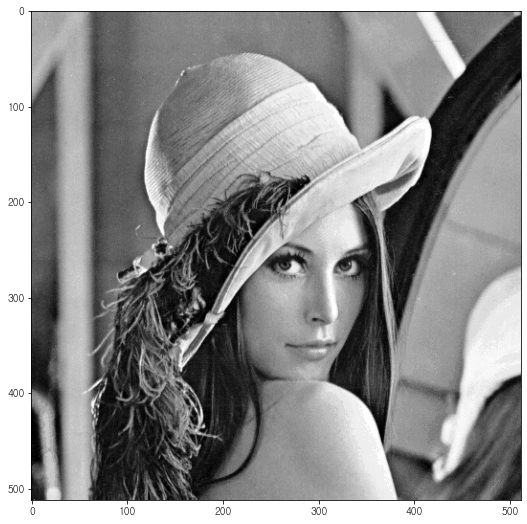

In [10]:
### 영상 출력 - imshow()
plt.imshow(img_gray, "gray")
plt.show()

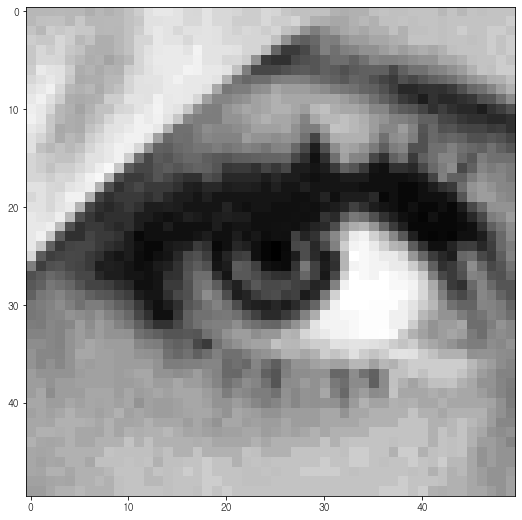

In [11]:
### 조각 영상
img_gray_sub = img_gray[240:290, 240:290]
plt.imshow(img_gray_sub, "gray")
plt.show()

In [12]:
img_gray_sub

array([[157, 157, 157, ..., 166, 166, 166],
       [158, 163, 164, ..., 166, 166, 172],
       [166, 157, 172, ..., 172, 172, 166],
       ...,
       [146, 145, 153, ..., 133, 133, 139],
       [142, 142, 145, ..., 133, 133, 142],
       [139, 139, 146, ..., 139, 133, 142]], dtype=uint8)

# ■ 컬러
- 컬러 영상의 구성 - RGB
- 컬러 영상의 인덱스(index) - BGR

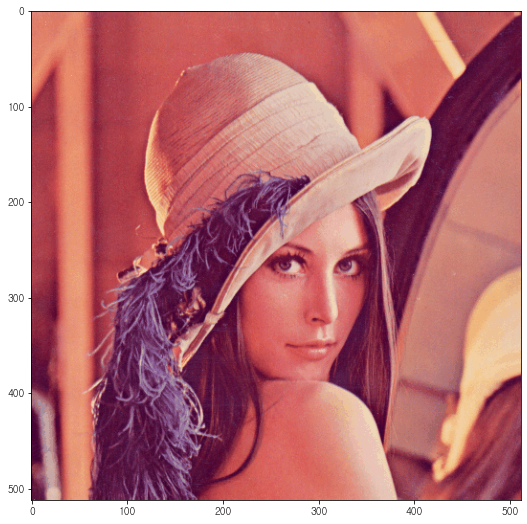

In [13]:
### BGR → RGB 변환
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [14]:
### BGR 영상
B = np.zeros(img_raw.shape, dtype="uint8")
G = B.copy()
R = B.copy()
B[:,:,0] = img_raw[:,:,0]
G[:,:,1] = img_raw[:,:,1]
R[:,:,2] = img_raw[:,:,2]

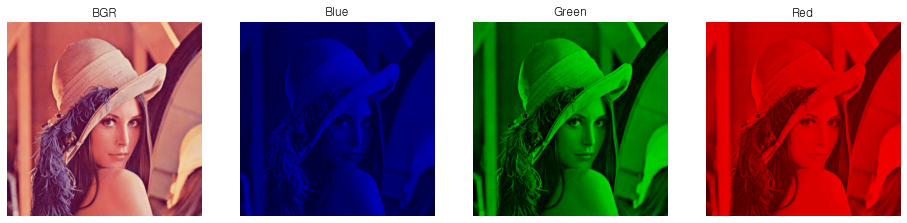

In [16]:
### RGB 영상으로 출력
titles = ["BGR", "Blue", "Green", "Red"]
images = [img_raw, B, G, R]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,4,i+1), plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## ● YCrCB(YCC) 컬러
- 인간의 눈이 명도에 민감하고 색도 성문에 덜 민감한 시각적인 특성을 고려한 것
- 흑백(grayxcale) 영상과 색차로 구성
- 디지털 표준 텔레비전에 사용: ITU-R BT.601 형식
- 비디오 및 스틸 이미지 압축과 전송(예: MPEG, JPEG)에 적합한 색 정보의 디지털 인코딩에 사용
    - Y(Luminance): 밝기
    - Cr(Chroma Red): 밝기와 빨간색 색차
- RGB ↔ (R - Y)ㆍYCrCb JPEG (of YCC)
    - Y ← 0.299ㆍR + 0.587ㆍG + 0.114ㆍB
    - Cr ← (R - Y)ㆍ0.713 + delta
    - Cb ← (B - Y)ㆍ0.564 + delta
    - R ← Y + 1.403ㆍ(Cr - delta)
    - G ← Y - 0.714ㆍ(Cr - delta) - 0.344ㆍ(Cb - delta)
    - B ← Y + 1.773ㆍ(Cb - delta)

In [17]:
### BGR → YCrCb 변환
img_ycc = cv2.cvtColor(img_raw, cv2.COLOR_BGR2YCrCb)

In [18]:
### 영상 분리
Y, Cr, Cb = cv2.split(img_ycc)

In [19]:
### Grayscale image
Y.shape

(512, 512)

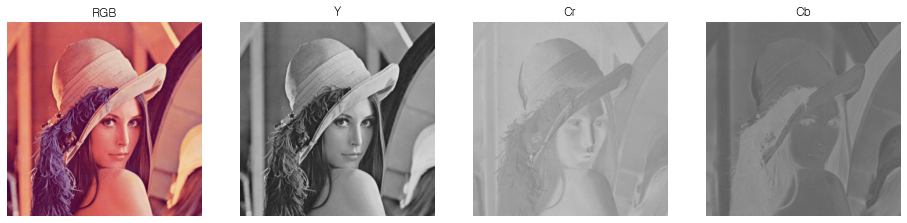

In [20]:
### RGB 영상으로 출력
titles = ["RGB", "Y", "Cr", "Cb"]
images = [img_raw, Y, Cr, Cb]
for i in  range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,4,i+1), plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## ● YCrCB(YCC) 컬러
- 1개의 루마 컴포넌트(Y')와 2개의 색차 컴포넌트(각각 파랑의 U와 빨강의 V)의 용어를 아우르는 색 공간을 정의
- 방송 시스템의 색 정보를 특정 "아날로그 인코팅"용으로 사용

In [21]:
### BGR → YUV 변환
img_yuv = cv2.cvtColor(img_raw, cv2.COLOR_BGR2YUV)

In [22]:
### 영상 분리
Y, U, V = cv2.split(img_yuv)

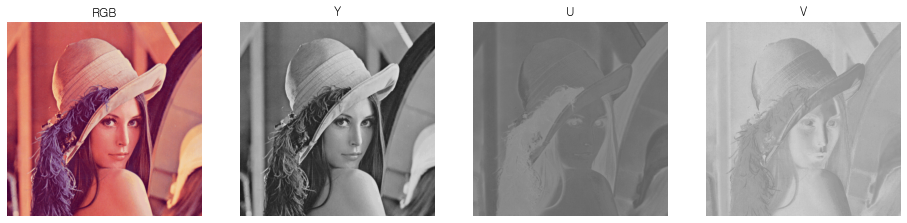

In [23]:
### RGB 영상으로 출력
titles = ["RGB", "Y", "U", "V"]
imgaes = [img_raw, Y, U, V]
for i in range(len(imgaes)):
    img_rgb = cv2.cvtColor(imgaes[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,4,i+1), plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

# ▶ 영상 출력
- cv2.imwrite(filename, img)
    - filename: Name of the file
    - img: (Mat or vector of Mat) Image or Images to be saved

In [24]:
### color 영상을 Grayscale 영상으로 변환
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

# 저장할 파일명 및 확장자
out_file = "lena_gray.jpg"
cv2.imwrite(out_file, img_gray)

True

In [25]:
# Get the current working directory
os.getcwd()

'C:\\Users\\sse88\\OneDrive\\바탕 화면\\영상처리'

In [26]:
# File list
os.listdir()

['.ipynb_checkpoints', 'lena_gray.jpg', 'Untitled.ipynb']